The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [81]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!

In [82]:
#load the dataset
nobel=pd.read_csv('data/nobel.csv')
print(nobel.head(2))

   year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France

[2 rows x 18 columns]


In [83]:
#find the most common gender and birth coutry
top_gender=nobel['sex'].value_counts().index[0]
top_country=nobel['birth_country'].value_counts().index[0]
print('the gender with the most Nobel laurealtes is :',top_gender)
print('the most common country of Nobel laureates:',top_country)


the gender with the most Nobel laurealtes is : Male
the most common country of Nobel laureates: United States of America


In [84]:
#create US_born winners column
nobel['usa_born_winner']=nobel['birth_country']=='United States of America'
print(nobel['usa_born_winner'])

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998    False
999     True
Name: usa_born_winner, Length: 1000, dtype: bool


In [85]:
#Create the decade column
nobel['decade']=(np.floor(nobel['year']//10)*10).astype(int)
print(nobel['decade'])

0      1900
1      1900
2      1900
3      1900
4      1900
       ... 
995    2020
996    2020
997    2020
998    2020
999    2020
Name: decade, Length: 1000, dtype: int64


In [86]:
#Finding the ratio
prop_usa_winners=nobel.groupby('decade',as_index=False)['usa_born_winner'].mean()
print(prop_usa_winners)

    decade  usa_born_winner
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.314050
12    2020         0.360000


In [87]:
#Identify the decade with the highest ratio of US_born winners 
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner']==prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]
print('The decade with the highest ratio of US_born winners :',max_decade_usa)

The decade with the highest ratio of US_born winners : 2000


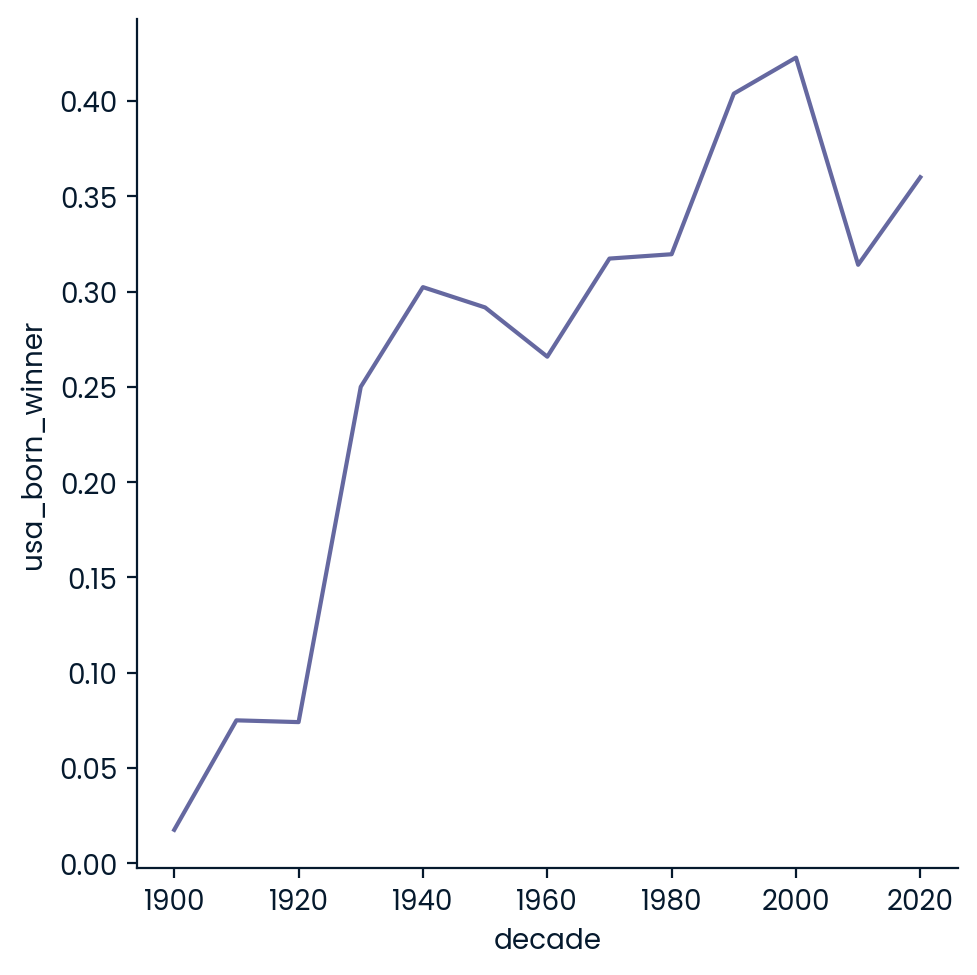

In [88]:
#Plotting USA born winners 
sns.relplot(x='decade',y='usa_born_winner',data=prop_usa_winners,kind='line')

In [89]:
#Find the decade and category with the highest proportion of female laureates
nobel['female_winner']=nobel['sex']=='Female'
print(nobel['female_winner'])

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998     True
999     True
Name: female_winner, Length: 1000, dtype: bool


In [90]:
prop_female_winners =nobel.groupby(['decade','category'],as_index=False)['female_winner'].mean()
print(prop_female_winners)

    decade    category  female_winner
0     1900   Chemistry       0.000000
1     1900  Literature       0.100000
2     1900    Medicine       0.000000
3     1900       Peace       0.071429
4     1900     Physics       0.076923
..     ...         ...            ...
67    2020   Economics       0.111111
68    2020  Literature       0.500000
69    2020    Medicine       0.125000
70    2020       Peace       0.285714
71    2020     Physics       0.166667

[72 rows x 3 columns]


In [91]:
max_decade_category=prop_female_winners[prop_female_winners['female_winner']==prop_female_winners['female_winner'].max()][['decade','category']]
max_female_dict={max_decade_category['decade'].values[0]:max_decade_category['category'].values[0]}
print(max_decade_category)

    decade    category
68    2020  Literature


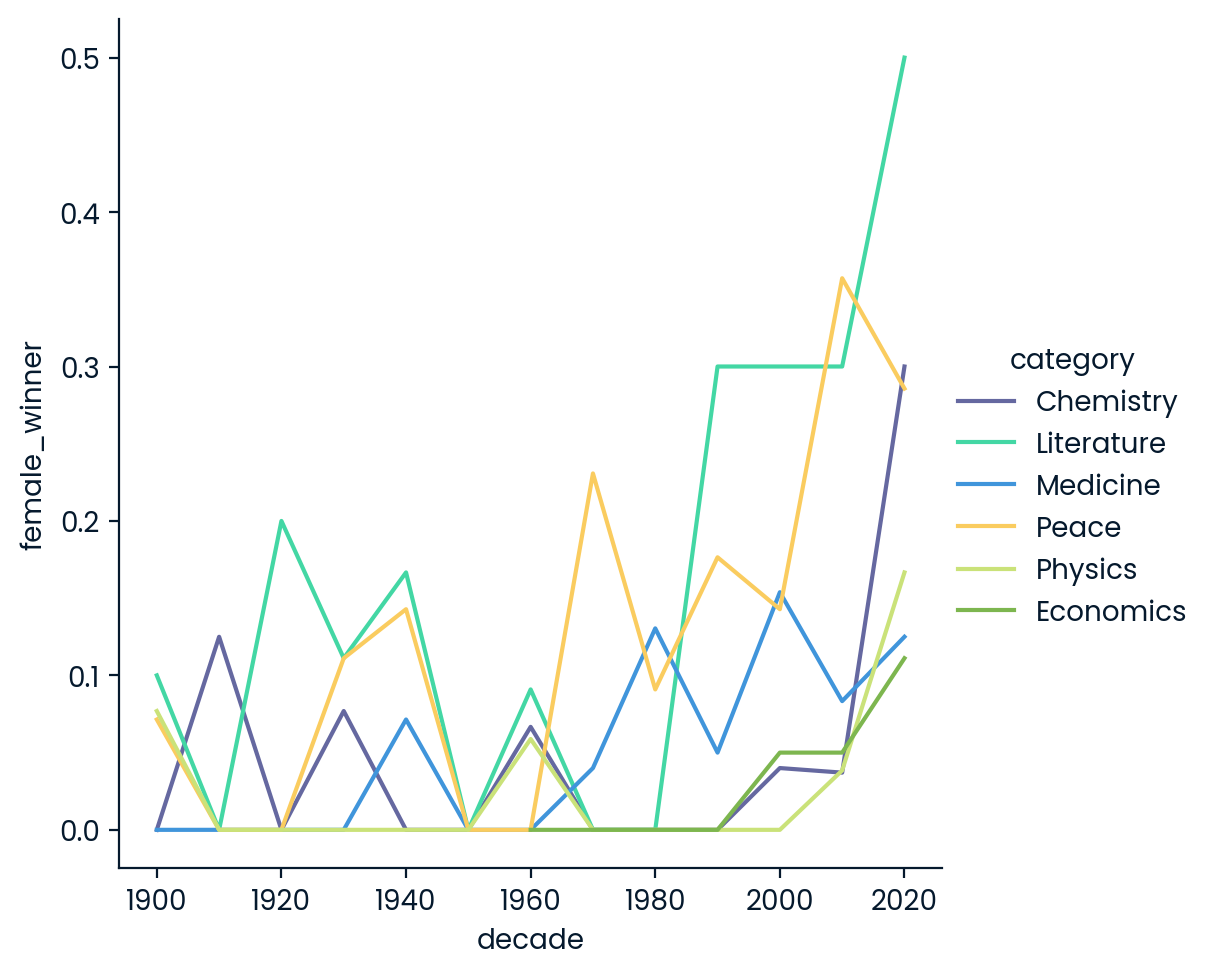

In [92]:
#plotting relational line plot with multiple categories 
sns.relplot(x='decade',y='female_winner',data=prop_female_winners,kind='line',hue='category')

In [93]:
#Find the first woman to win a Nobel Prize
nobel_woman=nobel[nobel['female_winner']]
min_row=nobel_woman[nobel_woman['year']==nobel_woman['year'].min()]
first_woman_name=min_row['full_name'].values[0]
first_woman_category=min_row['category'].values[0]
print('The first woman to win the nobel price in :',first_woman_category,'is:',first_woman_name)

The first woman to win the nobel price in : Physics is: Marie Curie, née Sklodowska


In [94]:
#Determine repeat winners


In [95]:
winners =nobel['full_name'].value_counts()
print(winners)
repeat_list=winners[winners>=2].index
repeat_list=list(repeat_list)
print(repeat_list)


Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
                                                                                    ..
Karl Ziegler                                                                         1
Giulio Natta                                                                         1
Giorgos Seferis                                                                      1
Sir John Carew Eccles                                                                1
Claudia Goldin                                                                       1
Name: full_name, Length: 993, dtype: int64
